In [ ]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
import math
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        self.final_ratio = None
        self.cov = None
        self.exp_return = None

    def sharpe_loss(self, y_true, y_pred):

        a = self.exp_return.reshape(1, -1) @ y_pred.reshape(-1, 1)
        b = self.cov @ y_pred.reshape(-1, 1)
        c = y_pred.reshape(1, -1) @ b.reshape(-1, 1)
        d = tf.math.sqrt(c)

        sharpe = a / d
        return -sharpe

    def __build_model(self, input_shape, outputs, l_rate):

        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        Opt = Adam(learning_rate = l_rate)
        model.compile(loss=self.sharpe_loss, optimizer=Opt)
        return model

    def get_allocations(self, data: pd.DataFrame, lr=0.1, ep=20, beta = 0.5):

        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)

        temparr = data.to_numpy()
        return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]
        exp_return = return_rate[0]
        for curr in return_rate:
          exp_return = beta*curr + (1-beta)*exp_return
        # cov = np.transpose(return_rate) @ return_rate
        # cov = cov/(len(data.index)-1)
        cov = np.cov(np.transpose(return_rate))

        data = data.iloc[1:]

        self.data = tf.cast(tf.constant(data), float)
        self.exp_return = tf.convert_to_tensor(exp_return, tf.float32)
        self.cov = tf.convert_to_tensor(cov, tf.float32)

        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns), l_rate = lr)

        fit_predict_data = data_w_ret[np.newaxis,:]
        history = self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=ep, shuffle=False)
        self.final_ratio = -history.history['loss'][-1]
        return self.model.predict(fit_predict_data)[0]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMF_data_final/uploaded_data_2/Dataset_2_csv.csv')
df = df[df.columns[1:]]
df = df.iloc[::-1]

In [ ]:
window = 30
num_days = len(df.index)
num_companies = df.columns.size
total_rows = num_days - window + 1

In [ ]:
lr = 0.1
num_epochs = 20
beta = 0.27

In [ ]:
weights = []

In [ ]:
for itr in range(total_rows):
  tempdf = df.iloc[itr:itr+window]
  temparr = tempdf.to_numpy()
  return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]

  m = Model()
  w = m.get_allocations(tempdf,lr,num_epochs,beta)
  weights.append(w)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.0363
Epoch 2/20
1/1 [==============================] - 0s 26ms/step - loss: -0.0532
Epoch 3/20
1/1 [==============================] - 0s 32ms/step - loss: -0.2409
Epoch 4/20
1/1 [==============================] - 0s 31ms/step - loss: -0.3936
Epoch 5/20
1/1 [==============================] - 0s 30ms/step - loss: -0.5024
Epoch 6/20
1/1 [==============================] - 0s 38ms/step - loss: -0.5417
Epoch 7/20
1/1 [==============================] - 0s 36ms/step - loss: -0.5572
Epoch 8/20
1/1 [==============================] - 0s 34ms/step - loss: -0.5881
Epoch 9/20
1/1 [==============================] - 0s 24ms/step - loss: -0.6088
Epoch 10/20
1/1 [==============================] - 0s 28ms/step - loss: -0.6098
Epoch 11/20
1/1 [==============================] - 0s 24ms/step - loss: -0.6024
Epoch 12/20
1/1 [==============================] - 0s 49ms/step - loss: -0.6118
Epoch 13/20
1/1 [==============================] - 0

1/1 [==============================] - 0s 401ms/step
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0686
Epoch 2/20
1/1 [==============================] - 0s 27ms/step - loss: -0.0186
Epoch 3/20
1/1 [==============================] - 0s 25ms/step - loss: -0.0542
Epoch 4/20
1/1 [==============================] - 0s 27ms/step - loss: -0.1861
Epoch 5/20
1/1 [==============================] - 0s 24ms/step - loss: -0.2804
Epoch 6/20
1/1 [==============================] - 0s 26ms/step - loss: -0.4149
Epoch 7/20
1/1 [==============================] - 0s 25ms/step - loss: -0.4893
Epoch 8/20
1/1 [==============================] - 0s 24ms/step - loss: -0.5297
Epoch 9/20
1/1 [==============================] - 0s 30ms/step - loss: -0.5465
Epoch 10/20
1/1 [==============================] - 0s 24ms/step - loss: -0.5533
Epoch 11/20
1/1 [==============================] - 0s 23ms/step - loss: -0.5530
Epoch 12/20
1/1 [==============================] - 0s 28ms/step - loss: -0.5540

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step - loss: -1.1499
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: -1.3202
Epoch 4/20
1/1 [==============================] - 0s 25ms/step - loss: -1.5148
Epoch 5/20
1/1 [==============================] - 0s 27ms/step - loss: -1.5355
Epoch 6/20
1/1 [==============================] - 0s 25ms/step - loss: -1.5256
Epoch 7/20
1/1 [==============================] - 0s 23ms/step - loss: -1.3456
Epoch 8/20
1/1 [==============================] - 0s 23ms/step - loss: -1.6126
Epoch 9/20
1/1 [==============================] - 0s 22ms/step - loss: -1.5543
Epoch 10/20
1/1 [==============================] - 0s 24ms/step - loss: -1.5566
Epoch 11/20
1/1 [==============================] - 0s 27ms/step - loss: -1.5470
Epoch 12/20
1/1 [==============================] - 0s 27ms/step - loss: -1.4918
Epoch 13/20
1/1 [==============================] - 0s 26ms/step - loss: -1.5338
Epoch 14

In [ ]:
weights = np.array(weights)

In [ ]:
result = pd.DataFrame(weights)
result.to_csv('Weights with 0_27 beta')

In [ ]:
result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5.419799e-10,1.681607e-06,7.912303e-11,1.810131e-11,3.073905e-10,2.338412e-03,1.966979e-11,1.227823e-11,1.647703e-11,3.355819e-07,...,9.553432e-09,1.052064e-09,1.784864e-11,2.566473e-01,1.543166e-11,1.501422e-01,7.605982e-07,2.103469e-11,1.818180e-11,1.782840e-11
1,4.762961e-13,8.095556e-08,5.737001e-10,2.038149e-13,2.510522e-09,2.093181e-07,9.239657e-14,1.204757e-13,1.685513e-13,1.084223e-07,...,1.007487e-01,7.522450e-08,1.158249e-07,2.724577e-11,7.035465e-14,1.272078e-01,7.454946e-08,4.476334e-13,6.805318e-12,2.178780e-13
2,6.225739e-14,2.918563e-10,6.046304e-13,1.573398e-15,3.083621e-15,5.215764e-12,4.241261e-15,8.561208e-16,1.339111e-15,4.823340e-13,...,8.780662e-01,8.232398e-13,1.691158e-04,4.758801e-15,2.061844e-15,2.422469e-03,4.393406e-11,7.150429e-16,4.236507e-15,2.411496e-15
3,5.784951e-11,3.090860e-12,1.881000e-10,2.003843e-09,2.731011e-09,1.218615e-05,2.238362e-10,1.271219e-11,6.882841e-10,1.361643e-08,...,3.039289e-01,2.664516e-10,1.807621e-08,3.818698e-12,9.010762e-10,6.636950e-10,4.057746e-09,3.601532e-09,6.605655e-10,1.650515e-10
4,2.809007e-11,7.982213e-06,6.532511e-10,3.327692e-09,6.397007e-05,5.577746e-06,9.793171e-10,1.488013e-11,1.554892e-08,1.206946e-10,...,1.622157e-06,4.614444e-12,2.999977e-10,4.123253e-12,4.882060e-11,2.184793e-01,5.404271e-10,7.520928e-13,1.369440e-07,2.649771e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2.065451e-04,2.011227e-02,2.138595e-01,5.649603e-05,9.504669e-03,4.379267e-06,8.095765e-08,4.275551e-09,9.101372e-09,4.063621e-09,...,3.598164e-09,3.377767e-08,2.381271e-03,1.723196e-02,4.331269e-08,5.753372e-09,1.952523e-09,4.414418e-06,3.787755e-09,1.080705e-08
216,2.449579e-08,3.329829e-07,1.171100e-10,6.527514e-05,1.577393e-10,6.283291e-06,1.709384e-08,2.659995e-10,3.570428e-10,4.897552e-09,...,1.165667e-09,1.146379e-01,2.009863e-09,9.322051e-11,3.781365e-10,3.711928e-10,4.962232e-10,4.493985e-07,2.971919e-10,8.279414e-11
217,1.482608e-07,6.815451e-07,1.550819e-12,4.716090e-10,2.077815e-12,3.849573e-09,1.197062e-08,2.158390e-12,2.005397e-12,1.374974e-07,...,3.586020e-10,1.331493e-07,2.060266e-12,9.864995e-13,1.626994e-11,1.316266e-12,2.715502e-12,6.525469e-08,1.381602e-12,5.334754e-13
218,5.206541e-09,1.776335e-06,5.913516e-13,3.753481e-05,6.651913e-14,6.941530e-14,4.297471e-13,5.298719e-13,5.835654e-13,4.468838e-11,...,6.857837e-09,5.735018e-14,2.119796e-09,2.869687e-13,5.057440e-14,8.103019e-05,3.361709e-10,9.025490e-08,3.315563e-13,1.147359e-12


## Checking Actual Returns

In [ ]:
prices = df.to_numpy()

In [ ]:
return_rate = (prices[1:] - prices[:-1])/prices[:-1]

In [ ]:
weights = weights[:-1]

In [ ]:
return_at_weight = []

In [ ]:
day = []

In [ ]:
for i in range(window, total_rows):
  r = weights[i-window]@return_rate[i]
  return_at_weight.append(r)
  day.append(i-window+1)

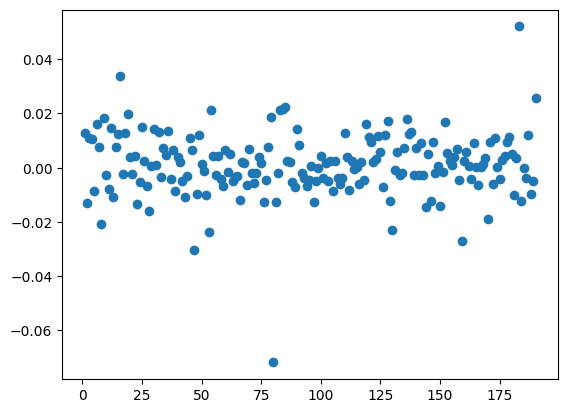

In [ ]:
plt.plot(day,return_at_weight,'o')
plt.show()

In [ ]:
print(sum(return_at_weight))

0.20734058007255723


In [ ]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')